In [16]:
# ===============================================================
# CAR FUEL EFFICIENCY PREDICTION (Polynomial Regression)
# SDG 7: Affordable & Clean Energy
# ===============================================================
# PROBLEM STATEMENT:
# "Can we build an AI model that predicts a car's fuel efficiency (MPG)
#  using its horsepower?"
#
# Why this matters:
# - Higher fuel efficiency = lower fuel cost
# - Better for the environment (less pollution)
# - Supports SDG 7 by promoting cleaner, efficient transportation
#
# Why Polynomial Regression?
# The relationship between Horsepower and MPG is NOT a straight line.
# Cars with very high horsepower usually consume LOTS of fuel.
# So we fit a CURVE instead of a straight line.
# ===============================================================

#  1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


#  2. LOAD & CLEAN THE DATA

# REAL dataset hosted online
data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Column names based on UCI documentation
col_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
             'Acceleration', 'Model Year', 'Origin', 'Car Name']

# Load dataset (space separated)
df = pd.read_csv(data_url, delim_whitespace=True, header=None, names=col_names, na_values='?')

# Remove rows where HP is missing
df = df.dropna()

# Convert horsepower to integer/float
df['Horsepower'] = pd.to_numeric(df['Horsepower'])

# Data preview
df.head()


/tmp/ipython-input-3457379319.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_url, delim_whitespace=True, header=None, names=col_names, na_values='?')


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Showing the relationship between Horsepower and MPG...


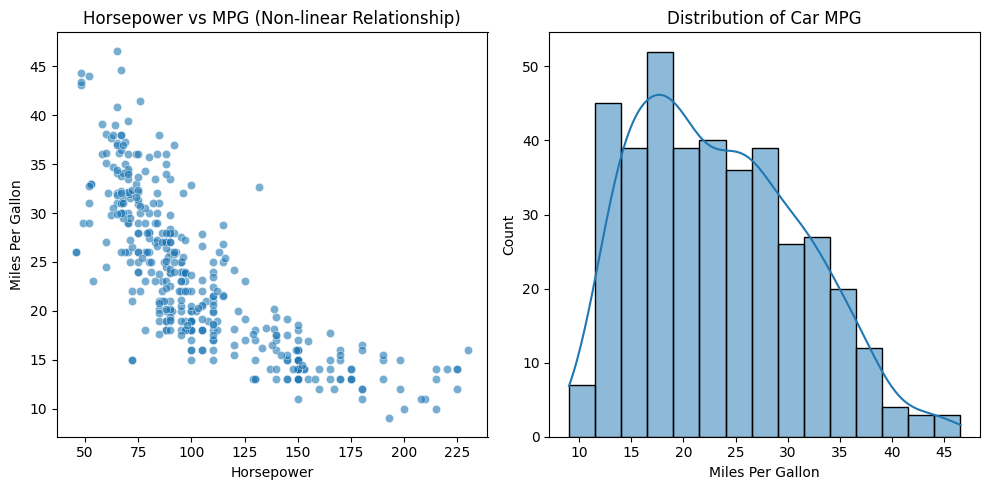

In [17]:
#  3. DATA VISUALIZATION

print("Showing the relationship between Horsepower and MPG...")

plt.figure(figsize=(10, 5))

# Scatter plot: shows the curve-like pattern
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Horsepower', y='MPG', alpha=0.6)
plt.title("Horsepower vs MPG (Non-linear Relationship)")
plt.xlabel("Horsepower")
plt.ylabel("Miles Per Gallon")

# Histogram of MPG
plt.subplot(1, 2, 2)
sns.histplot(df['MPG'], bins=15, kde=True)
plt.title("Distribution of Car MPG")
plt.xlabel("Miles Per Gallon")

plt.tight_layout()
plt.show()


In [18]:
#  4. SELECT FEATURES & TARGET

# Feature (input): Horsepower
X = df[['Horsepower']]

# Target (output): Fuel efficiency in MPG
y = df['MPG']

# Split the data into training and testing (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
# 🤖 5. BUILD & TRAIN POLYNOMIAL REGRESSION (DEGREE 2)

print("\nTraining the Polynomial Regression model (degree=2)...")

# Create a pipeline:
# Step 1 → Create extra features (HP²)
# Step 2 → Fit Linear Regression to these new features
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)



Training the Polynomial Regression model (degree=2)...


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

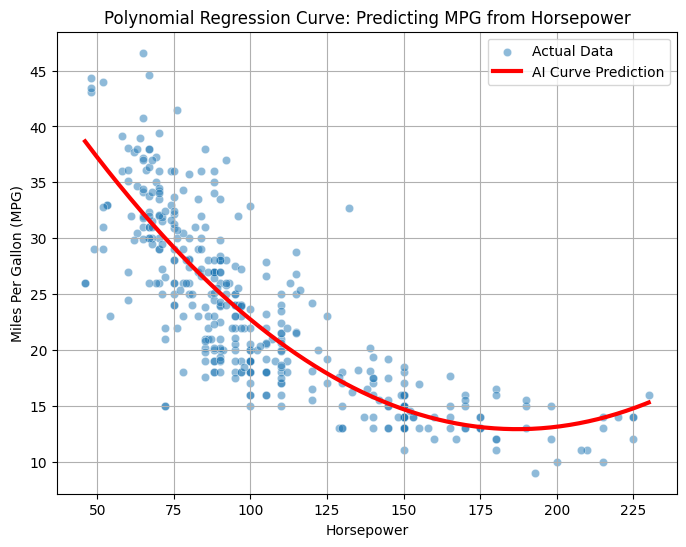

In [20]:
#  6. PLOTTING THE LEARNED CURVE

# Find min and max horsepower values
hp_min = X['Horsepower'].min()
hp_max = X['Horsepower'].max()

# Create a smooth range of horsepower values
hp_range = np.linspace(hp_min, hp_max, 300)

# Convert to DataFrame for prediction
hp_range_df = pd.DataFrame({'Horsepower': hp_range})

# Predict MPG for the smooth curve
mpg_pred = poly_model.predict(hp_range_df)

# Plot
plt.figure(figsize=(8, 6))

# Plot original data
sns.scatterplot(x=df['Horsepower'], y=df['MPG'], alpha=0.5, label="Actual Data")

# Plot AI prediction curve
plt.plot(hp_range, mpg_pred, color='red', linewidth=3, label="AI Curve Prediction")

plt.title("Polynomial Regression Curve: Predicting MPG from Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Miles Per Gallon (MPG)")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# 7. FINAL PREDICTION DEMO

example_hp = np.array([[100]])   # Example: car with 100 horsepower
predicted_mpg = poly_model.predict(example_hp)[0]

print("\n--- FINAL AI PREDICTION ---")
print(f"Car Horsepower: 100 HP")
print(f"Predicted Fuel Efficiency: {predicted_mpg:.2f} MPG")
print("\n(Meaning: A 100 HP car will give roughly this mileage.)")



--- FINAL AI PREDICTION ---
Car Horsepower: 100 HP
Predicted Fuel Efficiency: 22.72 MPG

(Meaning: A 100 HP car will give roughly this mileage.)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


 What does MPG mean?

MPG = Miles Per Gallon

It tells you how far a car can travel using 1 gallon of fuel.

Example:

If a car has 30 MPG, it can travel 30 miles with 1 gallon of petrol/diesel.

If a car has 10 MPG, it can only travel 10 miles with 1 gallon.

Simpler Explanation:

“MPG is a car’s fuel efficiency — higher MPG means better mileage.”

In Indian terms:

Since India uses kmpl (kilometers per litre):

MPG is the American version of kmpl.

Higher MPG = better mileage

Lower MPG = poor mileage, more fuel use